In [2]:
import sys
sys.path.append('..\..')
import os
import pickle
import pandas as pd
import numpy as np
from scipy import stats
import shutil
from set_global_params import mice_average_traces, processed_data_path, figure_directory, spreadsheet_path, reproduce_figures_path

In [3]:
mouse_ids = mice_average_traces['tail']
repro_dir = os.path.join(reproduce_figures_path, 'ED_fig4', 'exp_var')
repro_file_name = 'tail_mice_var_exp_with_return_to_centre_and_trimmed_traces_300frames_long_turns.p'
if not os.path.exists(os.path.join(repro_dir, repro_file_name)):
    trimmed_var_exp_filename_original = os.path.join(processed_data_path, '_'.join(mouse_ids) +  '_var_exp_with_return_to_centre_and_trimmed_traces_300frames_long_turns.p') 
    shutil.copy(trimmed_var_exp_filename_original, os.path.join(repro_dir, repro_file_name))
trimmed_var_exp = pd.read_pickle(os.path.join(repro_dir, repro_file_name))[['mouse_id', 'date', 'session number', 'var exp'  ]]

In [4]:
repro_dir = os.path.join(reproduce_figures_path, 'ED_fig4', 'exp_var')
repro_file_name = 'tail_mice_var_exp_with_return_to_centre_300frames_long_turns.p'
if not os.path.exists(os.path.join(repro_dir, repro_file_name)):
    trimmed_var_exp_filename_original = os.path.join(processed_data_path, '_'.join(mouse_ids) +  '_var_exp_with_return_to_centre_300frames_long_turns.p') 
    shutil.copy(trimmed_var_exp_filename_original, os.path.join(repro_dir, repro_file_name))
var_exp = pd.read_pickle(os.path.join(repro_dir, repro_file_name))[['mouse_id', 'date', 'session number', 'var exp'  ]]

In [5]:
stats.ttest_rel(var_exp['var exp'], trimmed_var_exp['var exp'])

Ttest_relResult(statistic=-14.190512303196876, pvalue=2.5908734856712906e-14)

In [6]:
trimmed_var_exp['var exp'].mean()

0.10279935271519065

In [7]:
var_exp['var exp'].mean()

0.07119415037710213

# without return to centre

In [7]:
site = 'tail'
file_name = site + '_explained_variances_all_cues_trimmed_traces_only_tracking_mice.p' 
repro_dir = os.path.join(reproduce_figures_path, 'ED_fig4', 'exp_var')
if not os.path.exists(os.path.join(repro_dir, file_name)):
    processed_data_dir = os.path.join(processed_data_path, 'linear_regression_data')
    shutil.copy(os.path.join(processed_data_dir, file_name), os.path.join(repro_dir, file_name))

var_exp_no_returns = pd.read_pickle(os.path.join(repro_dir, file_name))

In [8]:
var_exp_no_returns = var_exp_no_returns.rename(columns={'full model explained variance with trimming': 'original model with trimming' ,'full model explained variance without trimming':'original model no trimming'})

In [9]:
var_exp_no_returns['original model no trimming'].median()

0.05072604104509525

In [10]:
var_exp_no_returns['original model with trimming'].median()

0.08526785244076396

In [11]:
stats.ttest_rel(var_exp_no_returns['original model no trimming'], var_exp_no_returns['original model with trimming'])

Ttest_relResult(statistic=-9.70108192159193, pvalue=1.8727295900064778e-10)

In [12]:
all_reg_models = var_exp_no_returns.copy()

In [13]:
all_reg_models['with returns no trimming'] = var_exp['var exp']

In [14]:
all_reg_models['with returns and trimming'] = trimmed_var_exp['var exp']

In [15]:
all_reg_models = all_reg_models.rename(columns={'original model with trimming': 'original\n+trimming', 
                              'original model no trimming': 'original', 
                              'with returns no trimming': '+returns',
                              'with returns and trimming': '+returns\n+trimming'})

In [16]:
all_reg_models = all_reg_models[['mouse_id', 'date', 'original','+returns', 'original\n+trimming', '+returns\n+trimming']]


In [17]:
mean_df = all_reg_models.groupby('mouse_id').mean()

In [18]:
melted_df = pd.melt(mean_df, value_vars=['original','+returns', 'original\n+trimming', '+returns\n+trimming'], value_name='explained variance', var_name='model')

In [21]:
#save df to csv for publication
spreadsheet_file = os.path.join(spreadsheet_path, 'ED_fig4', 'ED_fig4M_exp_vars.csv')
if not os.path.exists(spreadsheet_file):
    melted_df.to_csv(spreadsheet_file)

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def make_box_plot(df, fig_ax,  dx ='model', dy = 'explained variance', ort = "v", pal = ['#E95F32', '#002F3A', '#F933FF', '#F933FF'], set_ylims=False, label=None, scatter_size=4):
    custom_palette = sns.set_palette(sns.color_palette(pal))
    keys = melted_df.model.unique()
    for i, key in enumerate(keys):
        data = df[df[dx] == key]
        noise = np.random.normal(0, 0.04, data.shape[0])
        fig_ax.scatter((data[dx].values == key).astype(int) * i + noise - 0.3, data[dy].values, color=pal[i], s=7, alpha=0.6)

    
    sns.boxplot(x=dx, y=dy, data=df, palette=custom_palette, width = .3, zorder = 10,linewidth=0.1, \
                showcaps = True, boxprops = {"zorder":10, 'alpha':.9},\
                showfliers=False, whiskerprops = {'linewidth':0.5, "zorder":10},\
                   saturation = 1, orient = ort, ax=fig_ax,
                 medianprops={'color':'white', 'linewidth':1})
    #fig_ax.set_xlim([-1, 3])
    if set_ylims:
        fig_ax.set_ylim([-2, np.max(df[dy]) + 2]) 
    if label:
        fig_ax.text(0.5, 1, label, transform=fig_ax.get_xaxis_transform(), size=8, ha='center')

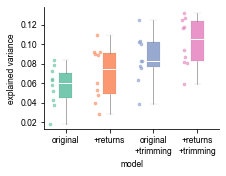

In [22]:
font = {'size': 8.5, 'family':'sans-serif', 'sans-serif':['Arial']}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1,1, figsize=[3.2,2.5])
matplotlib.rcParams['pdf.fonttype'] = 42
pal = sns.color_palette('Set2')
pal.as_hex()[:3]
make_box_plot(melted_df, ax, pal=pal)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tight_layout()


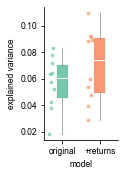

In [38]:
melted_df_no_trimming = pd.melt(mean_df[['original','+returns']], value_vars=['original','+returns'], value_name='explained variance', var_name='model')
font = {'size': 8.5, 'family':'sans-serif', 'sans-serif':['Arial']}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1,1, figsize=[1.8,2.5])
matplotlib.rcParams['pdf.fonttype'] = 42
pal = sns.color_palette('Set2')
pal.as_hex()[:3]
make_box_plot(melted_df_no_trimming, ax, pal=pal)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tight_layout()

# Perc of data covered by behavioral variables

In [3]:
site = 'tail'
file_name = site + '_perc_covereed_by_design_matrix_all_cues_trimmed_traces_only_tracking_mice.p'
repro_dir = os.path.join(reproduce_figures_path, 'ED_fig4', 'exp_var')
if not os.path.exists(os.path.join(repro_dir, file_name)):
    processed_data_dir = os.path.join(processed_data_path, 'linear_regression_data')
    shutil.copy(os.path.join(processed_data_dir, file_name), os.path.join(repro_dir, file_name))
perc_covered = pd.read_pickle(os.path.join(repro_dir, file_name))

In [9]:
perc_covered.groupby('mouse_id').mean().median()

perc covered by design matrix    68.057125
dtype: float64